### Building a CNN Using Keras
    - Fashion MNIST Dataset

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Input,Convolution2D,MaxPooling2D,Flatten,Dense,Dropout
from keras.utils import np_utils
import tensorflow

In [8]:
x = pd.read_csv('fashion-mnist.csv')
x_ = np.array(x)
x = x_[:10000,1:]
x = x/255.0
y = x_[:10000,0]
print(x.shape)
print(y.shape)

(10000, 784)
(10000,)


In [25]:
xT = pd.read_csv('fashion-mnist_test1.csv')
xT = np.array(xT)
x_ = xT[:5000,1:]
x_ = x_/255.0
y_ = xT[:5000,0]
print(x_.shape)
print(y_.shape)

(5000, 784)
(5000,)


In [10]:
x_train = x.reshape((-1,28,28,1))
y_train = np_utils.to_categorical(y)

print(x_train.shape,y_train.shape)

(10000, 28, 28, 1) (10000, 10)


In [26]:
x_test = x_.reshape((-1,28,28,1))
y_test = np_utils.to_categorical(y_)

print(x_test.shape,y_test.shape)

(5000, 28, 28, 1) (5000, 10)


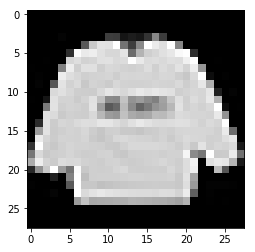

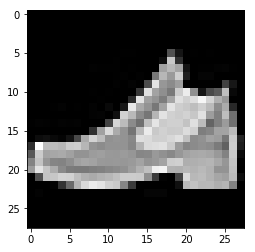

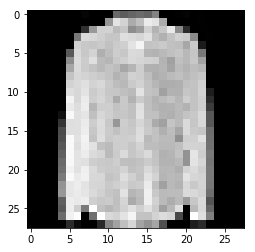

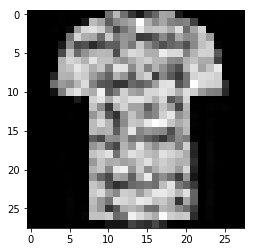

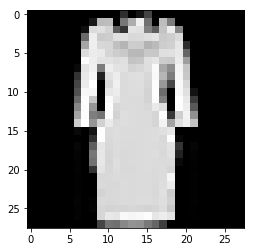

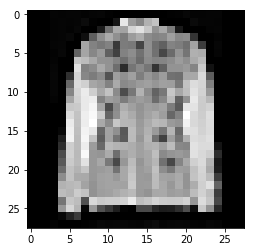

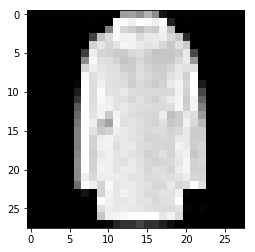

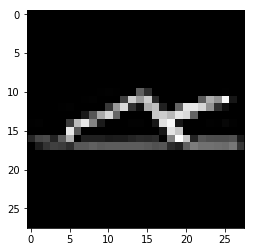

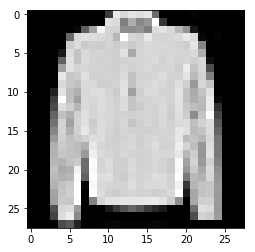

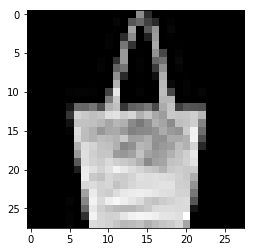

In [16]:
for ix in range(10):
    plt.figure(ix)
    plt.imshow(x_train[ix].reshape(28,28),cmap='gray')
    plt.show()

## CNN MODEL

In [19]:
model = Sequential()
model.add(Convolution2D(32,(3,3),activation = 'relu',input_shape=(28,28,1)))
model.add(Convolution2D(64,(3,3),activation = 'relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(32,(5,5),activation = 'relu'))
model.add(Convolution2D(8,(5,5),activation = 'relu'))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 32)          51232     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 8)           6408      
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)               0         
__________

In [20]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [22]:
hist = model.fit(x_train,y_train,epochs=20,shuffle=True,batch_size=256,validation_split=0.20)

Train on 8000 samples, validate on 2000 samples
Epoch 1/20
8000/8000 [==============================] - 32s 4ms/step - loss: 1.5186 - acc: 0.4729 - val_loss: 0.9827 - val_acc: 0.6320
Epoch 2/20
8000/8000 [==============================] - 30s 4ms/step - loss: 0.8062 - acc: 0.7049 - val_loss: 0.7041 - val_acc: 0.7465
Epoch 3/20
8000/8000 [==============================] - 31s 4ms/step - loss: 0.6605 - acc: 0.7510 - val_loss: 0.6602 - val_acc: 0.7670
Epoch 4/20
8000/8000 [==============================] - 30s 4ms/step - loss: 0.5981 - acc: 0.7770 - val_loss: 0.5904 - val_acc: 0.7890
Epoch 5/20
8000/8000 [==============================] - 31s 4ms/step - loss: 0.5487 - acc: 0.7961 - val_loss: 0.5889 - val_acc: 0.7845
Epoch 6/20
8000/8000 [==============================] - 31s 4ms/step - loss: 0.5213 - acc: 0.8076 - val_loss: 0.5457 - val_acc: 0.8045
Epoch 7/20
8000/8000 [==============================] - 30s 4ms/step - loss: 0.4753 - acc: 0.8274 - val_loss: 0.5199 - val_acc: 0.8125
Epoch 8

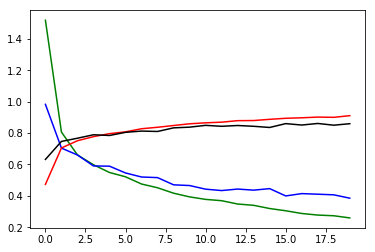

In [23]:
plt.figure(0)
plt.plot(hist.history['loss'],'g')
plt.plot(hist.history['val_loss'],'b')

plt.plot(hist.history['acc'],'r')
plt.plot(hist.history['val_acc'],'black')

plt.show()

In [47]:
model.predict?

In [43]:
yP = model.predict(x_test,verbose=1)
print(yP.shape)
print(y_test.shape)

5000/5000 [==============================] - 5s 921us/step
(5000, 10)
(5000, 10)


In [48]:
yP = yP.argmax(axis=-1)

In [51]:
print(yP)

[0 1 2 ... 2 6 9]


In [52]:
yP_ = np_utils.to_categorical(yP)
print(yP_.shape)

(5000, 10)


In [56]:
print(yP_)
print(y_test)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [63]:
# Testing Accuracy
acc = np.sum(y_==yP)/y_test.shape[0]
print(acc)

0.868


In [65]:
yp_train = model.predict(x_train)
yp_train = yp_train.argmax(axis=-1)

In [66]:
# Training Accuracy
acc_train = np.sum(yp_train==y)/y_train.shape[0]
print(acc_train)

0.9094
